
Olá, estudante!

Vamos para a nossa aula sobre visualização de distribuições conjuntas.

Bancos de dados de empresas contêm dados sobre as vendas, as compras, os lucros e prejuízos mensais. Conjuntos de dados imobiliários possuem informações sobre o valor, a área, a quantidade de cômodos, de banheiros e de vagas de garagem. Conjuntos de dados sobre carros fabricados por uma indústria podem conter informações sobre consumo médio de combustível, cavalos de força, aceleração e cilindradas dos veículos.

Você já deve ter notado que muitos conjuntos de dados possuem diversas variáveis, sendo conhecidos como dados multivariados. Compreender as relações existentes entre as múltiplas variáveis e distribuições é um desafio que nem sempre é fácil, mas permite uma compreensão ampla dos padrões existentes nos dados.

Para essa tarefa, visualizações de distribuições conjuntas são uma ferramenta poderosa. Assim, nesta aula, você aprenderá a representar múltiplas distribuições e relações entre variáveis de conjuntos de dados através da biblioteca seaborn.


# Tópico 1 – Distribuições bivariadas

Como você já deve saber, para visualizar a distribuição de uma variável quantitativa, costuma-se utilizar histograma ou gráfico de densidade. Para representar a relação entre duas variáveis quantitativas, pode-se utilizar gráficos de dispersão. Porém, o gráfico de dispersão por si não dá ênfase nas distribuições individuais de cada variável. A distribuição conjunta de duas variáveis chama-se distribuição bivariada e pode ser visualizada através de uma combinação entre histogramas e gráfico de dispersão.

Neste tópico, você aprenderá a criar gráficos de distribuição conjunta para representar distribuições bivariadas.

Para que você entenda melhor os assuntos estudados nesta aula, você irá explorar um conjunto de dados reais botânicos, contendo medidas de três espécies de flores íris.

Os exemplos serão executados no já conhecido ambiente Jupyter Notebooks e necessitam das bibliotecas pandas, matplotlib e seaborn devidamente instaladas. Primeiramente, você irá criar um notebook e importar e configurar as bibliotecas que serão utilizadas. Confira no código a seguir: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

Nas linhas 1 a 3 são importadas as bibliotecas atribuindo a elas os respectivos pseudônimos que são utilizados por padrão. O comando na linha 4, chamado palavra mágica, é específico do Jupyter Notebooks, e apenas diz que imagens geradas pelo matplotlib devem ser exibidas na página do Notebook. A linha 5 é opcional, e configura o estilo dos gráficos gerados com a biblioteca seaborn.

Pronto! Agora você já pode carregar os dados que iremos utilizar e começar a explorá-los.

Esse conjunto de dados é muito famoso no mundo de análise de dados e pode ser carregado diretamente através do seaborn, sem a necessidade de baixar os dados para a sua máquina. Confira, no código a seguir, como carregar os dados em um DataFrame de pandas através da função load_dataset() do seaborn e exibir as 5 primeiras linhas da tabela de dados. 

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


A função load_dataset() pode carregar diversos conjuntos de dados fornecidos pelo seaborn. No caso, passando o valor ‘iris’, o conjunto de dados de flores Iris foram carregados em um DataFrame e passados para a variável iris. A função head() exibe as 5 primeiras linhas do DataFrame. O conjunto de dados contém um conjunto de 150 linhas com cinco atributos - comprimento da sépala (parte constituinte da flor), largura da sépala, comprimento da pétala, largura da pétala, em centímetros e a espécie.

Esses dados foram coletados pelo estatístico Ronald Fisher. O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris: Iris setosa, Iris virginica e Iris versicolor. A ideia desse conjunto de dados é, a partir das medidas das pétalas e das sépalas, distinguir a espécie de flor Iris. Agora, para começar a nossa análise, vamos comparar as distribuições de duas variáveis: o comprimento da sépala e o comprimento da pétala. 

Como já dito, o histograma permite visualizar a distribuição de uma única variável, mas não favorece a comparação em uma distribuição bivariada. Já o gráfico de dispersão permite visualizar e comparar a distribuição conjunta, mas não favorece a percepção das distribuições individuais de uma distribuição conjunta, também chamadas marginais. Para sanar essa limitação, o seaborn fornece a função jointplot(), que permite visualizar uma distribuição conjunta através da combinação do histograma e do gráfico de dispersão. Confira, no exemplo a seguir, como visualizar a distribuição conjunta do comprimento da sépala e do comprimento da pétala: 

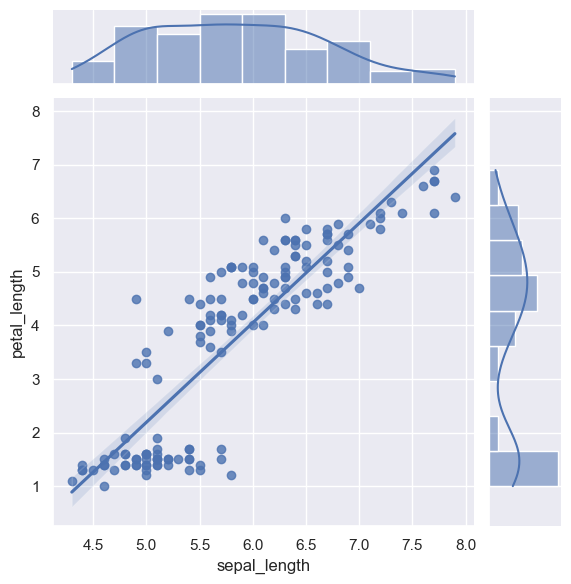

In [4]:
sns.jointplot(x='sepal_length', y='petal_length', kind='reg', data=iris)

Utilizar a função joinplot() é simples, bastando passar os valores que serão mapeados no eixo x e os valores que serão mapeados no eixo y, assim como se faria para criar um gráfico de dispersão com a função scatterplot(). A seguir, confira um pouco mais sobre essa função aplicada aos dados.

Um detalhe importante sobre a função jointplot() é que ela é baseada na classe do seaborn JointGrid, que controla a grade de visualizações do histograma com o gráfico de densidade e o gráfico de dispersão. Por isso, não é possível configurar o visual dessa função utilizando funções do matplotlib.pyplot, como é possível com outras funções do seaborn.

Note que, além dos eixos x e y, foi passada para o parâmetro kind o valor “reg”, indicando que a função deve desenhar a reta de regressão. Se nenhum valor for passado, a função desenha apenas o gráfico de dispersão e histograma.

Analise o resultado da função. No topo observa-se um histograma e gráfico de densidade da distribuição marginal dos comprimentos das sépalas e na lateral à direita, há a distribuição marginal do comprimento das pétalas. Em uma única visualização, pode-se perceber que existe uma forte correlação entre os comprimentos da pétala e da sépala, e que a distribuição dos comprimentos das pétalas possuem dois “picos”, no linguajar estatísticos chamados modas, sendo portanto uma distribuição bimodal. Esse tipo de gráfico é útil por poupar tempo e mostrar bastante informação de forma clara.

O seaborn oferece ainda outras variações para o jointplot(), que podem ser controlados através do parâmetro kind. Vamos continuar e conferir mais sobre isso. 

Uma das variações é o gráfico de hexbin, que é análogo ao histograma para duas dimensões. Nessa variação, ao invés de representar a distribuição conjunta por pontos, o plano cartesiano é dividido em “bins” hexagonais de dimensões iguais. A quantidade de dados dentro de um determinado bin é mapeada para uma escala de cor. Ou seja, quanto mais escuro o bin, mais dados há nele, formando um tipo de gráfico de densidade. Para criar um gráfico de hexbin, basta passar o valor ‘hex’ para o parâmetro kind. Confira: 

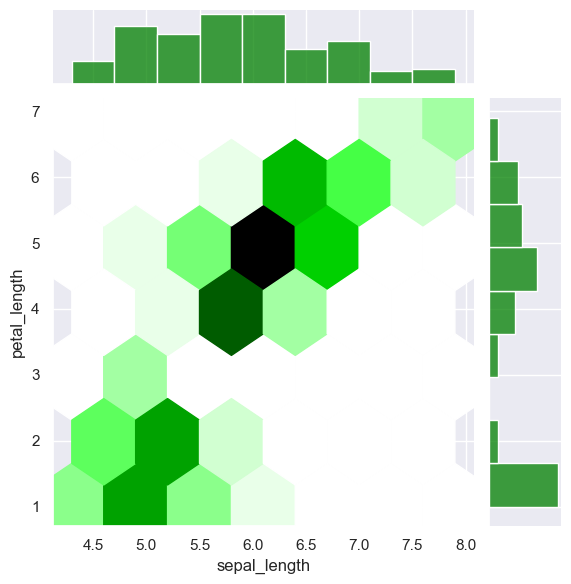

In [7]:
sns.jointplot(x='sepal_length', y='petal_length', kind='hex', color='green', data=iris)

Note que foi passado o valor ‘black’ para o parâmetro color, indicando que será utilizada uma escala de tons de cinza, onde quanto mais próximo do branco há menos dados, e quanto mais próximo do preto há mais dados.

Em relação ao gráfico de dispersão com reta de regressão, o gráfico de hexbin foca menos na correlação entre as duas variáveis e mais na distribuição espacial entre elas, chamando atenção para as regiões onde os dados são mais frequentes. 

Uma outra variação é o gráfico de densidade, onde são estimadas a probabilidade de haver elementos em uma dada região do gráfico. A principal diferença deste gráfico para o de hexbin é que a distribuição conjunta é representada por contornos que possuem uma continuidade, enquanto as marginais são representadas por curvas de probabilidade. Essas curvas de probabilidade são estimadas através de um método conhecido como Estimativa de Densidade de Kernel (em inglês, a sigla KDE é utilizada). Para utilizar esse tipo de gráfico, basta passar o valor ‘kde’ para o parâmetro kind. Confira: 

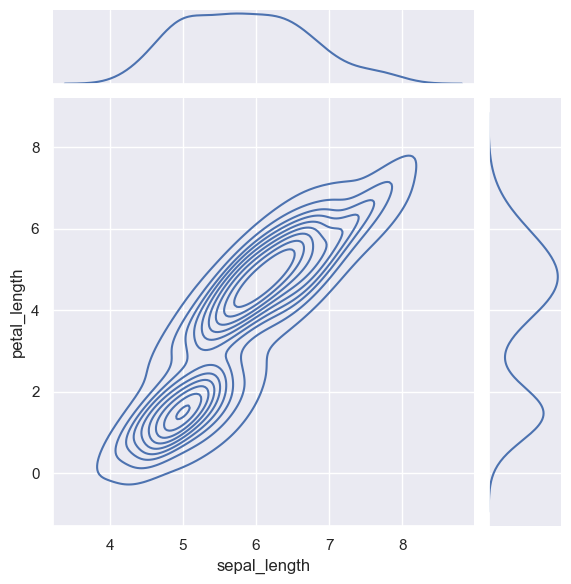

In [8]:
sns.jointplot(x='sepal_length', y='petal_length', kind='kde', data=iris)



Assim como o gráfico de hexbin, o gráfico de densidade foca na distribuição espacial dos dados. Porém, ele representa essa distribuição na forma de probabilidades, onde as áreas mais escuras possuem maior probabilidade de conter dados e as mais claras possuem menos. Comparando, é a diferença entre um histograma e uma curva de densidade de probabilidade para uma distribuição univariada. O gráfico de densidade mostra a distribuição conjunta de forma mais suave e pode ser mais indicado quando o conjunto de dados é muito grande, ajudando a identificar padrões espaciais. Mas é importante lembrar que ele é uma estimativa criada a partir dos dados. Já o gráfico de hexbin mostra a distribuição real dos dados, mas a sua precisão, assim como no histograma, depende da escolha do tamanho dos bins.

Compare as duas visualizações. Qual você achou que transmitiu a distribuição conjunta de forma mais clara? A seguir, verifique um box “Fique atento!” e confira uma dica bacana.


Gráficos de distribuição conjunta são muito úteis para analisar a distribuição entre duas variáveis. Porém, é comum que conjuntos de dados possuam muitas variáveis quantitativas. Nesse caso, pode ser cansativo analisar uma a uma, todas as possíveis combinações de variáveis à procura de padrões significativos. Para facilitar esse trabalho, o seaborn possui funções para comparar múltiplas distribuições conjuntas em uma única visualização. Esse método será abordado no próximo tópico. 

# Tópico 2 – Distribuições conjuntas par a par

Ao explorar conjuntos de dados com muitas variáveis, muitas vezes não sabemos que padrões estamos procurando e explorar as relações entre as diferentes variáveis pode ser cansativo. Nesses casos, é muito útil um método que permita uma visão geral do conjunto de dados, possivelmente, revelando padrões que podem ser investigados com outras visualizações mais específicas. A biblioteca seaborn fornece uma função muito útil para este fim, chamada pairplot().

Neste tópico, você irá aprender a utilizar a função pairplot() para visualizar múltiplas distribuições, simultaneamente, e entenderá como diferenciar as distribuições por categorias.

A função pairplot() é uma das mais práticas do seaborn. Passando como parâmetro apenas a variável que contém o DataFrame, a função identifica todas as variáveis quantitativas e exibe uma matriz de visualizações par a par, mostrando a relação entre cada combinação de variáveis. Por padrão, também exibe a distribuição univariada de cada variável na diagonal. Confira como utilizar a função no exemplo a seguir: 

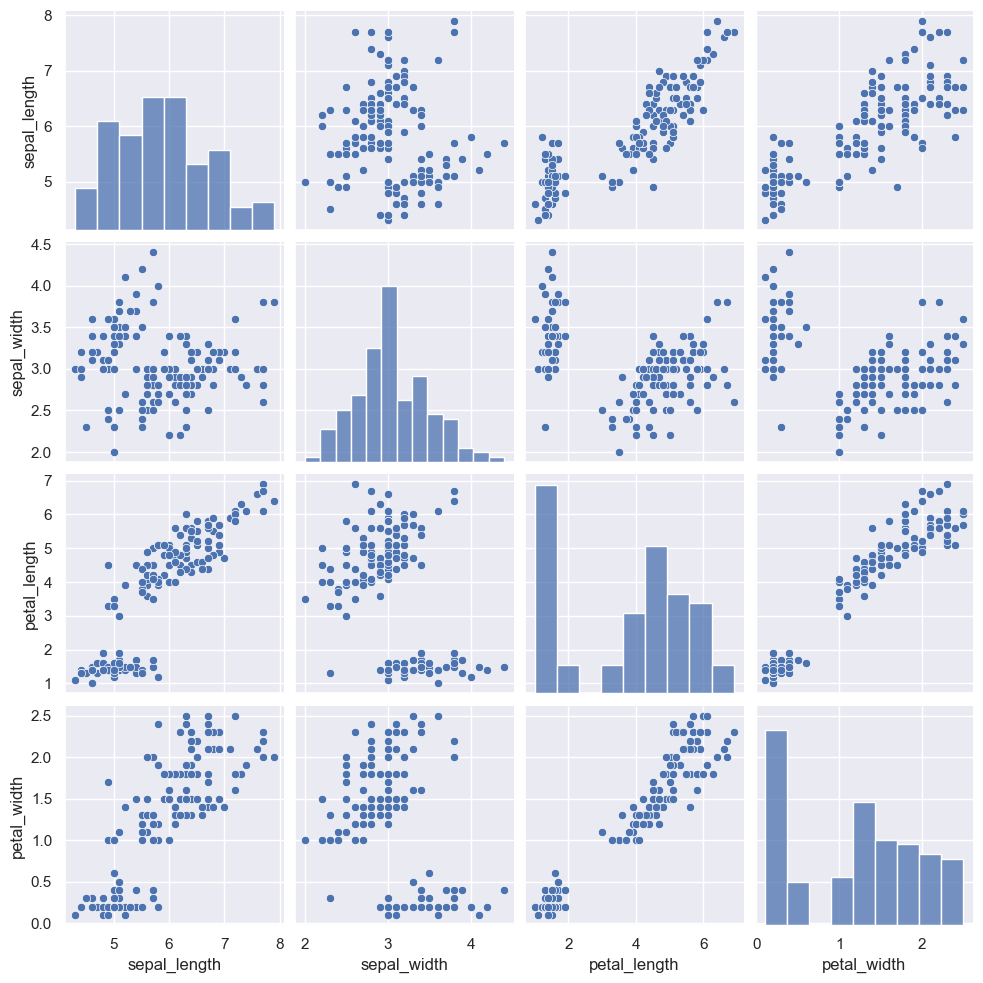

In [9]:
sns.pairplot(iris)



Essa função é baseada na classe do seaborn PairGrid, que configura o visual das múltiplas visualizações. Por esse motivo, não pode ser configurada com funções do matplotlib.pyplot.

Observe o resultado. Cada linha e cada coluna da matriz representa uma variável. Quando a variável da linha e da coluna são distintas, o elemento da matriz mostra um gráfico de dispersão das duas variáveis. Quando é a mesma, mostra o histograma da variável. Em uma mesma visualização, é possível analisar as relações entre as variáveis possíveis, além das distribuições univariadas. Como mostra muita informação em uma única imagem, ela não favorece a percepção de detalhes em particular, mas sim uma visão geral do conjunto de dados que pode ser aprofundada posteriormente. Conferindo rapidamente, pode-se notar, por exemplo, que existe uma forte correlação positiva entre o comprimento e a largura da pétala.


Também é possível utilizar o parâmetro kind para alterar a visualização. Por exemplo, para criar uma reta de regressão, basta passar o valor ‘reg’ para o parâmetro kind, da mesma forma que foi feito com a função jointplot(). Confira: 

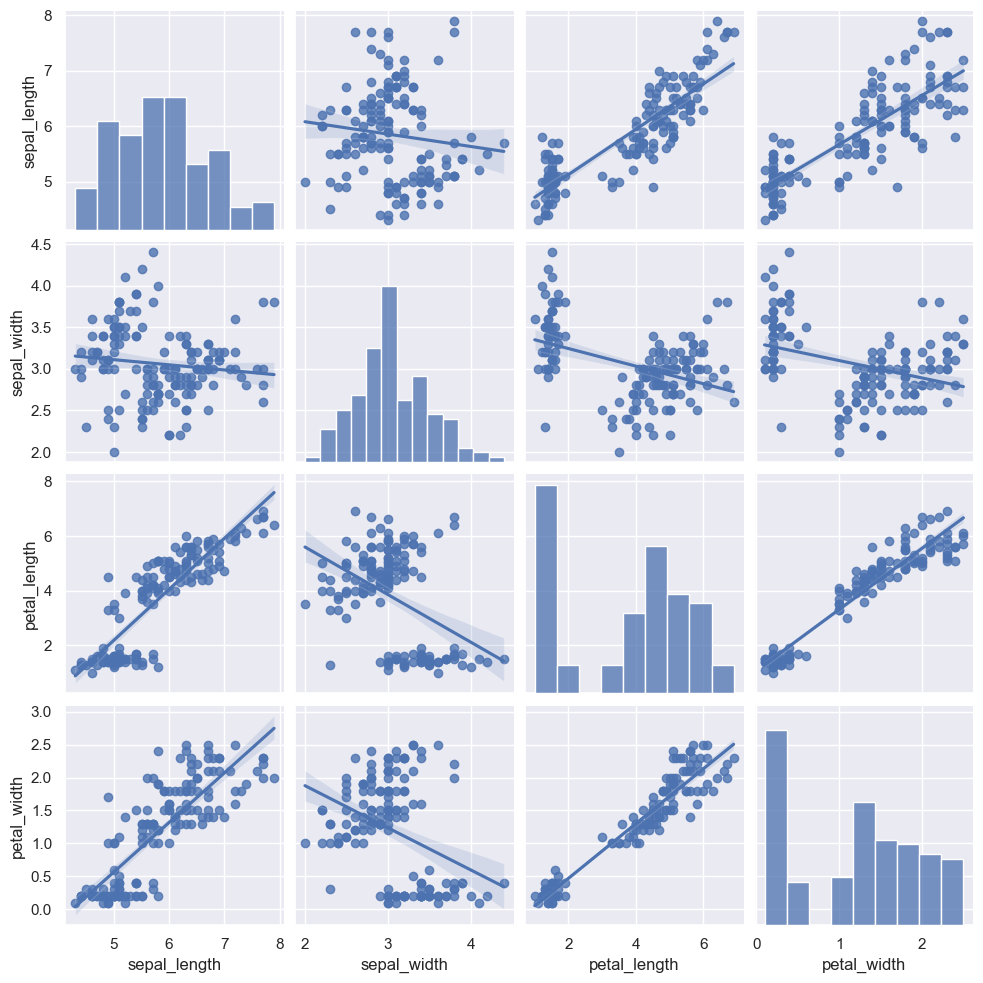

In [10]:
sns.pairplot(iris, kind='reg')

Essa visualização enfatiza as correlações existentes entre as diferentes variáveis. Ela é bastante útil para conhecer as variáveis quantitativas. Mas em relação a variáveis categóricas? No caso desse conjunto de dados em particular, o maior interesse é em como distinguir as três espécies de Íris a partir das medidas das pétalas e sépalas. Confira a seguir como isso pode ser feito.

Para distinguir as três espécies, a função pairplot() consegue distinguir uma variável categórica em distribuições conjuntas, mapeando a categoria para uma cor. Para isso, basta passar a coluna com a variável categórica, nesse caso, basta passar a coluna ‘species’ para o parâmetro hue. Confira no exemplo a seguir: 

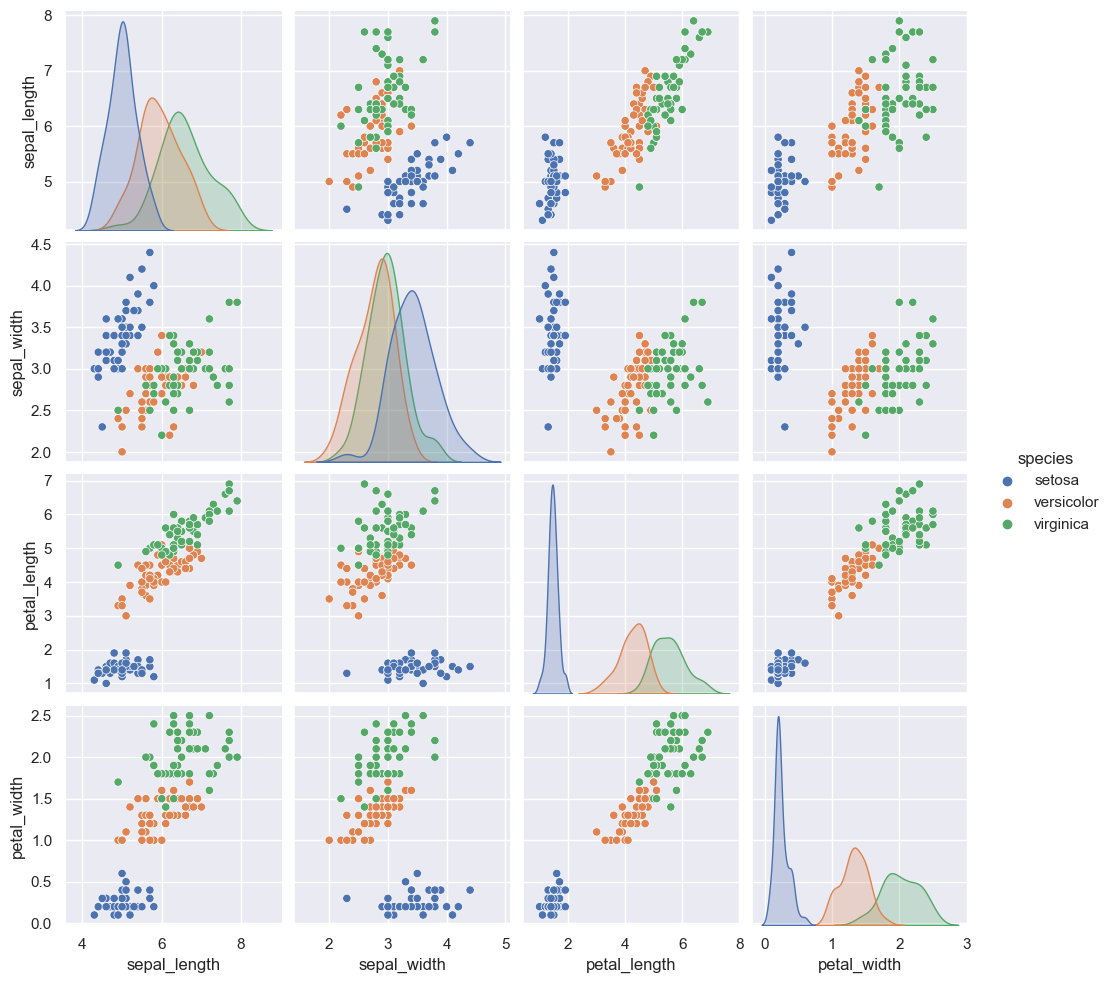

In [11]:
sns.pairplot(iris, hue='species')



Observe que nos gráficos de dispersão os pontos azuis são Iris da espécie setosa, os laranjas são da espécie versicolor e os verdes da espécie virginica. Além disso, na diagonal as distribuições univariadas são representadas por gráficos de densidade, onde é feita uma separação por espécie.

Note como a função pairplot() é prática: Através de uma única função, conseguimos uma visão geral de todas as variáveis do conjunto de dados! Para o objetivo de distinguir as espécies, pode-se notar, por exemplo, que o comprimento e largura da pétala são bastante informativos. Note que as distribuições tanto do comprimento como da largura são bastante separáveis entre as espécies, com poucas áreas de interseção. Além disso, na distribuição conjunta do comprimento e largura da pétala, nota-se que as espécies possuem uma separação razoável, onde as setosas possuem menores comprimentos e larguras, as versicolor possuem valores intermediários e as virginicas possuem valores maiores, com alguma interseção. A seguir, confira um box “Saiba mais!” com uma informação bem interessante.


Ao se explorar um conjunto de dados com múltiplas variáveis quantitativas, é uma boa prática começar a explorá-lo utilizando a função pairplot() e depois criar visualizações que aprofundem as relações mais interessantes. Além disso, essa função é muito flexível, assim como outras do seaborn, e pode ter o visual configurado de muitas formas através dos seus parâmetros. Para conhecer todas as possibilidades, consulte a documentação oficial da função neste link:
https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot. 



Nessa aula, você aprendeu a utilidade de visualizações de distribuições conjuntas na análise exploratória de dados e teve a oportunidade de criar essas visualizações com a biblioteca seaborn. Com essa ferramenta, será muito mais fácil obter um entendimento geral dos dados e depois aprofundá-los com visualizações mais específicas. Lembre-se de exercitar o que você aprendeu e de estudar as possibilidades de customização visual oferecidas pela biblioteca seaborn.

Espero que você tenha aprendido bastante. Até a próxima aula!


Referências

    WILKE, Claus O. Fundamentals of Data Visualization. O’Reilly, 2019.
    Matplotlib. https://matplotlib.org/index.html. Acessado pela última vez em Maio de 2020.
    Seaborn. https://seaborn.pydata.org/tutorial.html. Acessado pela última vez em Maio de 2020.
